#instalation

In [ ]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
# profile = ProfileReport(df, title = 'Mall Customers', html={'style':{'full_width':True}})
# profile.to_notebook_iframe()

#Import

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

#Split Train data and Unseen data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/BryanT05/Machine-Learning-Bootcamp/main/Final%20Project/healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.duplicated().sum()

0

There is no duplicated data

In [ ]:
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']

In [ ]:
print(df.stroke.value_counts())
print("Stroke percentage: {}%".format(round(100 * (sum(df.stroke == 1) / len(df)), 2)))

0    4861
1     249
Name: stroke, dtype: int64
Stroke percentage: 4.87%


We can see the data is imbalance so we cannot use Accuracy as metrics. we will use ROC_AUC for this skewed data.

Before going to the EDA we will split our data, The split will be 80% train data and 20% validation data, the validation data will be used as unseen data to measure how good our model predict real world (unseen) data.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 42, stratify = y)

In [ ]:
print(y_train.value_counts())
print("Stroke percentage: {}%".format(round(100 * (sum(y_train) / len(y_train)), 2)))

0    3645
1     187
Name: stroke, dtype: int64
Stroke percentage: 4.88%


In [ ]:
print(y_val.value_counts())
print("Stroke percentage: {}%".format(round(100 * (sum(y_val) / len(y_val)), 2)))

0    1216
1      62
Name: stroke, dtype: int64
Stroke percentage: 4.85%


In [ ]:
df_train = X_train.join(y_train)

In [ ]:
df_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
837,Female,39.0,0,0,No,Govt_job,Urban,79.44,22.7,never smoked,0
2899,Male,55.0,0,0,Yes,Private,Urban,68.79,27.0,never smoked,0
708,Female,59.0,0,0,Yes,Private,Urban,240.71,43.9,formerly smoked,0
3144,Female,79.0,0,0,No,Self-employed,Rural,82.07,30.4,Unknown,0
4920,Female,75.0,0,0,Yes,Private,Rural,68.38,33.8,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
1434,Female,45.0,0,0,Yes,Private,Urban,92.86,35.1,formerly smoked,0
461,Female,16.0,0,0,No,children,Rural,113.47,19.5,Unknown,0
1052,Female,61.0,0,0,Yes,Private,Rural,78.65,36.2,formerly smoked,0
1757,Male,31.0,0,0,Yes,Private,Urban,74.05,26.0,Unknown,0


#Pandas Profiling

In [ ]:
profile = ProfileReport(df_train, title = 'Stroke Dataset', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# import IPython
# IPython.display.HTML(filename= "Stroke_report.html")

#Insight

**Some insight we got:**


1. The data is imbalance (4.88% stroke)
2. hypertension, heart disease, stroke is in integer


**Description** | **Type**
--- | ---
work_type is highly correlated with bmi | **High correlation**
ever_married is highly correlated with age | **High correlation**
bmi is highly correlated with work_type|**High correlation**
age is highly correlated with work_type|**High correlation**
smoking_status is highly correlated with ever_married|**High correlation**
work_type is highly correlated with ever_married|**High correlation**
ever_married is highly correlated with work_type|**High correlation**
bmi has 158 (4.1%) missing values|**Missing**


#EDA

##Univariate Analysis

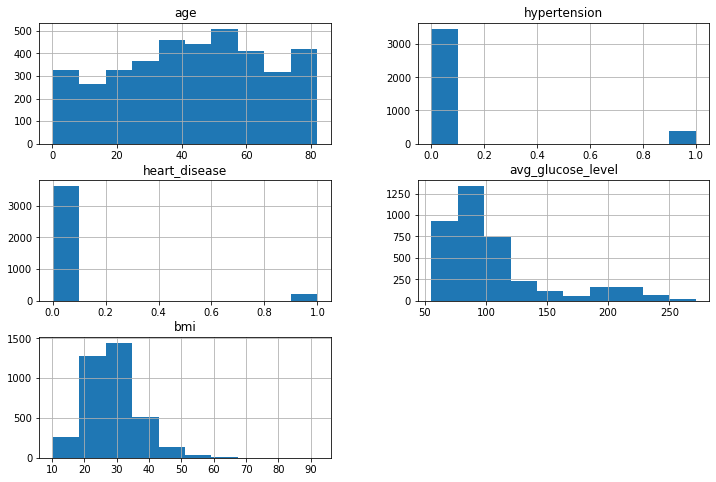

In [ ]:
X_train.hist(figsize=(12,8))
plt.show()

We can see here the data is skewed, so we will use standarization and power transformation (yeo johnson) or usually known as normalization to make the data fit the model better

In [ ]:
df_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
print (f'{round(df_train["gender"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df_train, x="gender", title='Gender', width=400, height=400)
fig.show()

Female    58.51
Male      41.47
Other      0.03
Name: gender, dtype: float64


In [ ]:
print (f'{round(df_train["age"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df_train, x="age", title='age', width=400, height=400)
fig.show()

78.00    1.85
57.00    1.83
54.00    1.77
52.00    1.72
79.00    1.72
         ... 
0.48     0.05
0.64     0.05
1.48     0.03
1.16     0.03
0.08     0.03
Name: age, Length: 103, dtype: float64


In [ ]:
print (f'{round(df_train["hypertension"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df_train, x="hypertension", title='hypertension', width=400, height=400)
fig.show()

0    90.37
1     9.63
Name: hypertension, dtype: float64


In [ ]:
print (f'{round(df_train["heart_disease"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df_train, x="heart_disease", title='heart_disease', width=400, height=400)
fig.show()

0    94.68
1     5.32
Name: heart_disease, dtype: float64


In [ ]:
print (f'{round(df_train["ever_married"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df_train, x="ever_married", title='ever_married', width=400, height=400)
fig.show()

Yes    66.05
No     33.95
Name: ever_married, dtype: float64


In [ ]:
print (f'{round(df_train["work_type"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df_train, x="work_type", title='work_type', width=400, height=400)
fig.show()

Private          56.86
Self-employed    16.49
children         13.49
Govt_job         12.81
Never_worked      0.34
Name: work_type, dtype: float64


In [ ]:
print (f'{round(df_train["Residence_type"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df_train, x="Residence_type", title='Residence_type', width=400, height=400)
fig.show()

Urban    50.57
Rural    49.43
Name: Residence_type, dtype: float64


In [ ]:
print (f'{round(df_train["avg_glucose_level"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df_train, x="avg_glucose_level", title='avg_glucose_level', width=400, height=400)
fig.show()

93.88     0.16
84.10     0.13
90.42     0.10
84.40     0.10
56.11     0.10
          ... 
73.28     0.03
118.85    0.03
105.61    0.03
103.35    0.03
96.00     0.03
Name: avg_glucose_level, Length: 3163, dtype: float64


In [ ]:
print (f'{round(df_train["bmi"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df_train, x="bmi", title='bmi', width=400, height=400)
fig.show()

28.4    0.87
26.7    0.87
27.3    0.87
25.1    0.82
28.7    0.73
        ... 
44.2    0.03
66.8    0.03
52.3    0.03
64.8    0.03
40.6    0.03
Name: bmi, Length: 396, dtype: float64


In [ ]:
print (f'{round(df_train["smoking_status"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df_train, x="smoking_status", title='smoking_status', width=400, height=400)
fig.show()

never smoked       36.87
Unknown            30.56
formerly smoked    17.48
smokes             15.08
Name: smoking_status, dtype: float64


In [ ]:
print (f'{round(df_train["stroke"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df_train, x="stroke", title='stroke', width=400, height=400)
fig.show()

0    95.12
1     4.88
Name: stroke, dtype: float64


##Bivariate Analysis

In [ ]:
female = round(df_train[df_train["gender"]=="Female"]["stroke"].mean()*100,2)
male = round(df_train[df_train["gender"]=="Male"]["stroke"].mean()*100,2)

print (f'Percentage of female get a stroke = {female} %')
print (f'Percentage of male get a stroke =  {male} %')
print (f'Percentage of other category get a stroke = {round(df_train[df_train["gender"]=="Other"]["stroke"].mean()*100,2)} %')
ratio = round(female/male,2)
print(f'\nRatio female : male get a stroke = {ratio}')

fig = px.histogram(df_train, x="gender", title='Gender & Stroke', width=400, height=400, color = 'stroke')
fig.show()

Percentage of female get a stroke = 4.82 %
Percentage of male get a stroke =  4.97 %
Percentage of other category get a stroke = 0.0 %

Ratio female : male get a stroke = 0.97


In [ ]:
with_hypertension = round(df_train[df['hypertension'] == 1]['stroke'].mean()*100, 2)
without_hypertension = round(df_train[df['hypertension'] == 0]['stroke'].mean()*100, 2)
ratio = round(with_hypertension / without_hypertension,2)

print(f'Percentage of a person with hypertension have stroke = {with_hypertension}%')
print(f'Percentage of a person without hypertension have stroke = {without_hypertension}%')
print(f'Ratio With hypertension : Without hypertension = {ratio}')

fig = px.histogram(df_train, x="hypertension", title='hypertension & Stroke', width=400, height=400, color = 'stroke')
fig.show()

Percentage of a person with hypertension have stroke = 12.74%
Percentage of a person without hypertension have stroke = 4.04%
Ratio With hypertension : Without hypertension = 3.15


In [ ]:
with_heart_disease = round(df_train[df_train['heart_disease'] == 1]['stroke'].mean()*100, 2)
without_heart_disease = round(df_train[df_train['heart_disease'] == 0]['stroke'].mean()*100, 2)
ratio = round(with_heart_disease / without_heart_disease,2)

print(f'Percentage of a person with heart_disease have stroke = {with_heart_disease}%')
print(f'Percentage of a person without heart_disease have stroke = {without_heart_disease}%')
print(f'Ratio With heart_disease : Without heart_disease = {ratio}')

fig = px.histogram(df_train, x="heart_disease", title='heart_disease & Stroke', width=400, height=400, color = 'stroke')
fig.show()

Percentage of a person with heart_disease have stroke = 17.16%
Percentage of a person without heart_disease have stroke = 4.19%
Ratio With heart_disease : Without heart_disease = 4.1


In [ ]:
df_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
837,Female,39.0,0,0,No,Govt_job,Urban,79.44,22.7,never smoked,0
2899,Male,55.0,0,0,Yes,Private,Urban,68.79,27.0,never smoked,0
708,Female,59.0,0,0,Yes,Private,Urban,240.71,43.9,formerly smoked,0
3144,Female,79.0,0,0,No,Self-employed,Rural,82.07,30.4,Unknown,0
4920,Female,75.0,0,0,Yes,Private,Rural,68.38,33.8,Unknown,0


In [ ]:
with_heart_disease = round(df_train[df_train['heart_disease'] == 1]['stroke'].mean()*100, 2)
without_heart_disease = round(df_train[df_train['heart_disease'] == 0]['stroke'].mean()*100, 2)
ratio = round(with_heart_disease / without_heart_disease,2)

print(f'Percentage of a person with heart_disease have stroke = {with_heart_disease}%')
print(f'Percentage of a person without heart_disease have stroke = {without_heart_disease}%')
print(f'Ratio With heart_disease : Without heart_disease = {ratio}')

fig = px.histogram(df_train, x="heart_disease", title='heart_disease & Stroke', width=400, height=400, color = 'stroke')
fig.show()

Percentage of a person with heart_disease have stroke = 17.16%
Percentage of a person without heart_disease have stroke = 4.19%
Ratio With heart_disease : Without heart_disease = 4.1


In [ ]:
married = round(df_train[df_train["ever_married"]=="No"]["stroke"].mean()*100,2)
unmarried = round(df_train[df_train["ever_married"]=="Yes"]["stroke"].mean()*100,2)

print (f'Percentage of married person get a stroke = {married} %')
print (f'Percentage of unmarried person get a stroke =  {unmarried} %')
ratio = round(unmarried/married,2)
print(f'\nRatio unmarried : married get a stroke = {ratio}')

fig = px.histogram(df_train, x="ever_married", title='ever_married & Stroke', width=400, height=400, color = 'stroke')
fig.show()

Percentage of married person get a stroke = 1.54 %
Percentage of unmarried person get a stroke =  6.6 %

Ratio unmarried : married get a stroke = 4.29


In [ ]:
Govt_job = round(df_train[df_train["work_type"]=="Govt_job"]["stroke"].mean()*100,2)
Private = round(df_train[df_train["work_type"]=="Private"]["stroke"].mean()*100,2)
Self_employed = round(df_train[df_train["work_type"]=="Self-employed"]["stroke"].mean()*100,2)
children = round(df_train[df_train["work_type"]=="children"]["stroke"].mean()*100,2)
Never_worked = round(df_train[df_train["work_type"]=="Never_worked"]["stroke"].mean()*100,2)

print (f'Percentage of a person work in goverment get a stroke = {Govt_job} %')
print (f'Percentage of a person do private work get a stroke = {Private} %')
print (f'Percentage of self employed person get a stroke = {Self_employed} %')
print (f'Percentage of a children get a stroke = {children} %')
print (f'Percentage of a person never worked get a stroke = {Never_worked} %')


fig = px.histogram(df_train, x="work_type", title='work_type & Stroke', width=400, height=400, color = 'stroke')
fig.show()

Percentage of a person work in goverment get a stroke = 5.5 %
Percentage of a person do private work get a stroke = 4.96 %
Percentage of self employed person get a stroke = 8.07 %
Percentage of a children get a stroke = 0.19 %
Percentage of a person never worked get a stroke = 0.0 %


In [ ]:
Urban = round(df_train[df_train["Residence_type"]=="Urban"]["stroke"].mean()*100,2)
Rural = round(df_train[df_train["Residence_type"]=="Rural"]["stroke"].mean()*100,2)

print (f'Percentage of a person live in urban area get a stroke = {Urban} %')
print (f'Percentage of a person live in rural area get a stroke =  {Rural} %')
ratio = round(Urban/Rural,2)
print(f'\nRatio Urban : Rural get a stroke = {ratio}')

fig = px.histogram(df_train, x="Residence_type", title='Residence_type & Stroke', width=400, height=400, color = 'stroke')
fig.show()

Percentage of a person live in urban area get a stroke = 5.06 %
Percentage of a person live in rural area get a stroke =  4.7 %

Ratio Urban : Rural get a stroke = 1.08


In [ ]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
formerly_smoked = round(df_train[df_train["smoking_status"]=="formerly smoked"]["stroke"].mean()*100,2)
never_smoked = round(df_train[df_train["smoking_status"]=="never smoked"]["stroke"].mean()*100,2)
smokes = round(df_train[df_train["smoking_status"]=="smokes"]["stroke"].mean()*100,2)
unknown = round(df_train[df_train["smoking_status"]=="Unknown"]["stroke"].mean()*100,2)

print (f'Percentage of a person who formerly smoked get a stroke = {formerly_smoked} %')
print (f'Percentage of a person who never smoked get a stroke = {never_smoked} %')
print (f'Percentage of a person who smokes get a stroke = {smokes} %')
print (f'Percentage of a person Unknown smoking or not get a stroke = {unknown} %')

fig = px.histogram(df_train, x="smoking_status", title='smoking_status & Stroke', width=400, height=400, color = 'stroke')
fig.show()

Percentage of a person who formerly smoked get a stroke = 7.61 %
Percentage of a person who never smoked get a stroke = 4.74 %
Percentage of a person who smokes get a stroke = 5.71 %
Percentage of a person Unknown smoking or not get a stroke = 3.07 %


In [ ]:
dummy_df = df_train.copy()
def bin_age(x):
  if x <= 40:
    return 'Under 40'
  else:
    return 'Above 40'

def bin_glucose(x):
  if x <= 125:
    return 'Under 125'
  elif 125 < x <= 175:
    return 'Between 125 and 175'
  else:
    return 'Above 175'

def bin_bmi(x):
  if x < 18.5:
    return 'underweight'
  elif x < 25:
    return 'normal'
  elif x < 30:
    return 'overweight'
  else:
    return 'obese'

In [ ]:
dummy_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
837,Female,39.0,0,0,No,Govt_job,Urban,79.44,22.7,never smoked,0
2899,Male,55.0,0,0,Yes,Private,Urban,68.79,27.0,never smoked,0
708,Female,59.0,0,0,Yes,Private,Urban,240.71,43.9,formerly smoked,0
3144,Female,79.0,0,0,No,Self-employed,Rural,82.07,30.4,Unknown,0
4920,Female,75.0,0,0,Yes,Private,Rural,68.38,33.8,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
1434,Female,45.0,0,0,Yes,Private,Urban,92.86,35.1,formerly smoked,0
461,Female,16.0,0,0,No,children,Rural,113.47,19.5,Unknown,0
1052,Female,61.0,0,0,Yes,Private,Rural,78.65,36.2,formerly smoked,0
1757,Male,31.0,0,0,Yes,Private,Urban,74.05,26.0,Unknown,0


In [ ]:
dummy_df['bin_age'] = df['age'].apply(bin_age)
dummy_df['bin_glucose'] = df['avg_glucose_level'].apply(bin_glucose)
dummy_df['bin_bmi'] = df['bmi'].apply(bin_bmi)

In [ ]:
under_40 = round(dummy_df[dummy_df["bin_age"] == 'Under 40']["stroke"].mean()*100,2)
above_40 = round(dummy_df[dummy_df["bin_age"] == 'Above 40']["stroke"].mean()*100,2)
ratio = round(above_40/under_40,2)

print (f'Percentage of a person under 40 years old get a stroke = {under_40} %')
print (f'Percentage of a person above 40 years old get a stroke = {above_40} %')
print(f'Ratio above 40 years old : under 40 years old get a stroke = {ratio}')

fig = px.histogram(dummy_df, x="bin_age", title='age & Stroke', width=400, height=400, color = 'stroke')
fig.show()

# sns.regplot(x = 'age', y = 'stroke', data = dummy_df)
# plt.title('Age & Stroke')
# plt.show()

Percentage of a person under 40 years old get a stroke = 0.18 %
Percentage of a person above 40 years old get a stroke = 8.57 %
Ratio above 40 years old : under 40 years old get a stroke = 47.61


In [ ]:
df_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
under_125 = round(df_train[df_train["avg_glucose_level"] <= 125]["stroke"].mean()*100,2)
between_125_175 = round(df_train[(125 < df_train["avg_glucose_level"]) & (df_train["avg_glucose_level"] <= 175)]["stroke"].mean()*100,2)
above_175 = round(df_train[df_train["avg_glucose_level"] > 175]["stroke"].mean()*100,2)

print (f'Percentage of a person with average glucose level under 125 get a stroke = {under_125} %')
print (f'Percentage of a person with average glucose level between 125 and 175 get a stroke = {between_125_175} %')
print (f'Percentage of a person with average glucose level above 175 get a stroke = {above_175} %')

fig = px.histogram(dummy_df, x="bin_glucose", title='glucose & Stroke', width=400, height=400, color = 'stroke')
fig.show()

# sns.regplot(x = 'avg_glucose_level', y = 'stroke', data = df_train)
# plt.title('avg_glucose_level & Stroke')
# plt.show()

Percentage of a person with average glucose level under 125 get a stroke = 3.62 %
Percentage of a person with average glucose level between 125 and 175 get a stroke = 5.56 %
Percentage of a person with average glucose level above 175 get a stroke = 13.11 %


In [ ]:
underweight = round(dummy_df[dummy_df["bin_bmi"] == 'underweight']["stroke"].mean()*100,2)
normal = round(dummy_df[dummy_df["bin_bmi"] == 'normal']["stroke"].mean()*100,2)
overweight = round(dummy_df[dummy_df["bin_bmi"] == 'overweight']["stroke"].mean()*100,2)
obese = round(dummy_df[dummy_df["bin_bmi"] == 'obese']["stroke"].mean()*100,2)

print (f'Percentage of a person with underweight body get a stroke = {underweight} %')
print (f'Percentage of a person with normal body get a stroke = {normal} %')
print (f'Percentage of a person with overweight body get a stroke = {overweight} %')
print (f'Percentage of a person with obese body get a stroke = {obese} %')

fig = px.histogram(dummy_df, x="bin_bmi", title='bmi & Stroke', width=400, height=400, color = 'stroke')
fig.show()

# sns.regplot(x = 'bmi', y = 'stroke', data = df_train)
# plt.title('bmi & Stroke')
# plt.show()

Percentage of a person with underweight body get a stroke = 0.39 %
Percentage of a person with normal body get a stroke = 2.99 %
Percentage of a person with overweight body get a stroke = 4.91 %
Percentage of a person with obese body get a stroke = 6.68 %


0.36 %
Percentage of a person above 40 years old get a stroke = 8.41 %
Ratio above 40 years old : under 40 years old get a stroke = 23.36

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Percentage of female get a stroke = 4.82 %
Percentage of male get a stroke =  4.97 %

#Insight from EDA

###Affect stroke greatly
1. **age greatly affect stroke chance**, people with age under 40 rarely get stroke compared to those above 40 years old with. this means people above 40 have 23 times higher chance get stroke.

###Affect stroke

1. **hypertension affect stroke chance**, people with hypertension have 3 times more chance of get stroke than those without hypertension
4. **heart disease affect stroke chance**, people with heart disease  have 4 times more chance of get stroke than those without heart disease
5. **ever married affect stroke chance**, those who ever married have chance to get stroke 4 times bigger than the one who have not married
6. **work type affect stroke chance**, people who are self employed has the highest chance to get stroke (7.94 %). And, people who never worked and children have the lowest chance to get stroke
8. **average glucose level affect stroke chance**, people with average glucose level above 175 have 3 to 5 times more chance to get stroke than the others.
9. **bmi affect stroke chance**, people with underweight body have small chance to get stroke, meanwhile people with obese body have the highest chance to get obese. higher bmi means higher chance

###Does not affect stroke
1. **gender does not affect stroke chance**, there is only slight difference between male and female
7. **Residence type does not affect stroke chance**, there is just a slightly difference chance for those who live in urban area and rural area.

10. **smoking status does not affect stroke chance**, people who formerly smoked, never smoked and smokes just have slight difference chance to get stroke.

In [ ]:
df_train.corr(method = 'spearman')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.273445,0.273006,0.135900,0.377219,0.249380
hypertension,0.273445,1.000000,0.103852,0.105117,0.165525,0.119044
heart_disease,0.273006,0.103852,1.000000,0.104269,0.066499,0.135122
avg_glucose_level,0.135900,0.105117,0.104269,1.000000,0.113924,0.077136
bmi,0.377219,0.165525,0.066499,0.113924,1.000000,0.052469
stroke,0.249380,0.119044,0.135122,0.077136,0.052469,1.000000


In [ ]:
df_train.corr(method= 'pearson')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.269858,0.267305,0.229352,0.333350,0.244167
hypertension,0.269858,1.000000,0.103852,0.172154,0.164642,0.119044
heart_disease,0.267305,0.103852,1.000000,0.163349,0.040965,0.135122
avg_glucose_level,0.229352,0.172154,0.163349,1.000000,0.174542,0.130756
bmi,0.333350,0.164642,0.040965,0.174542,1.000000,0.036798
stroke,0.244167,0.119044,0.135122,0.130756,0.036798,1.000000


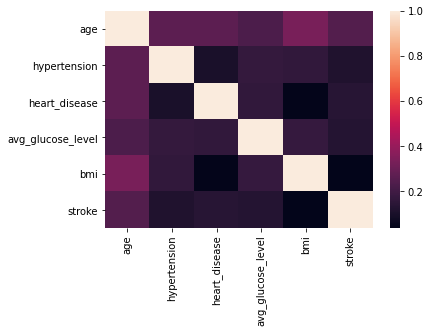

In [ ]:
sns.heatmap(df_train.corr())

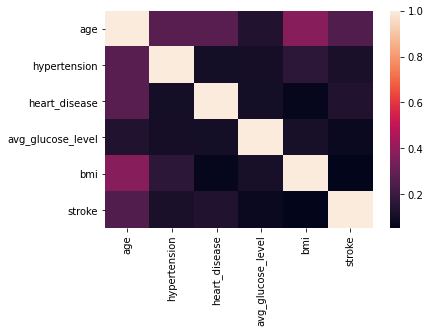

In [ ]:
sns.heatmap(df_train.corr(method='spearman'))